---
# Three Nodes Multistability

## **Libraries**

In [1]:
%pylab inline
from evaCure import main, parameters
import Tools.ext as Te
import Tools.stats as Ts
import Tools.display as Td
import Tools.matrices as Tm
import Tools.functions as Tf

Populating the interactive namespace from numpy and matplotlib


## **Connectivity**

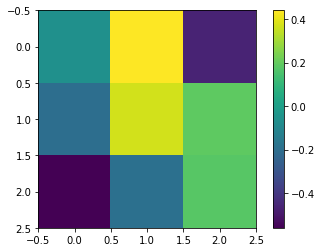

In [2]:
C = array([[-.06, 0.44, -.46],
           [-.20, 0.37, 0.19],
           [-.56, -.19, 0.18]])
imshow(C, interpolation='nearest'); colorbar();

---
# Hopfield: Static & Local $\theta$

In [3]:
conn = {'conn': C.T, 
        'normC': 1.}

model = {'model': 'HopfieldBasedStatic',
         'threshold': 'local',
         'tauT': 80,         
         'P': 1.,
         'G': 100.,}

noise = {'stdD_x': .5,
         'stdD_T': 10.,
         'colors': ['white','white']}

out = ['x','A']

other = {'init': 'rand',
         'dens': 0.6,
         'rperiod': 1,
         'dur':'1s'}

In [12]:
eva = main.evaCure(evaCon=conn, evaNoi=noise, evaMod=model, out=out, **other)

In [13]:
eva.updateTillEnd()

(10%), time elapsed: 0.03s
Time estimated: 0h00min00s


In [14]:
x = array(eva.out['x'])
A = array(eva.out['A'])

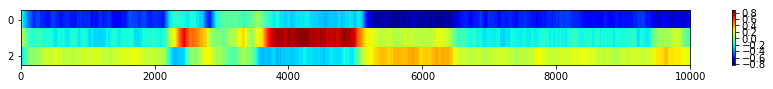

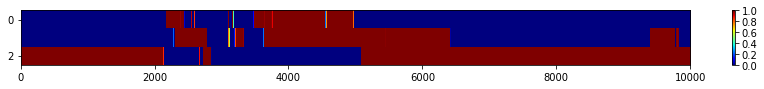

In [15]:
figure(figsize=(15,1)); imshow(x.T, aspect='auto', interpolation='nearest', cmap='jet'); colorbar();
figure(figsize=(15,1)); imshow(A.T, aspect='auto', interpolation='nearest', cmap='jet'); colorbar();

In [16]:
cc = Ts.fPearsonCorrelation(x[::10])
FCs = Ts.windowedFCs(x[::10])
DFC = Ts.windowedCorrelations(FCs)

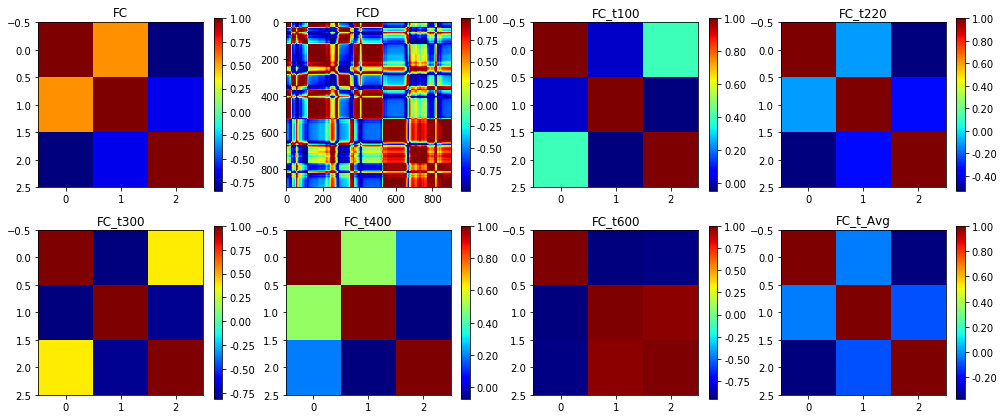

In [20]:
speT = 100,220,300,400,600
Td.mapMatrices([cc, DFC]+[FCs[i] for i in speT] +[FCs.mean(0)], 
               lTitl=['FC','FCD']+['FC_t%s'%i for i in speT]+['FC_t_Avg'],
               cbar=1, interpolation='nearest', fs=(17,7), ncl=(4,2), cmap='jet')

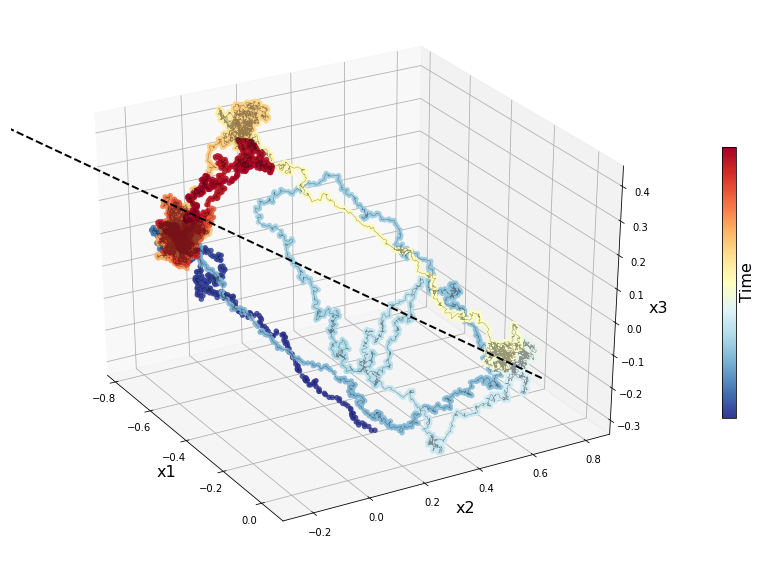

In [22]:
S = array([x[:,0], x[:,1], x[:,2]]); #shuffle(S)
ax,_,cb = Td.plot4D(S[0], S[1], S[2], 'RdYlBu_r', kwaSca={'s':20,'alpha':.8},
                    fig=figure(figsize=(15,10)), line=1, cbar=1, view=(30,-30), ret=1);
ax.set_xlabel('x1', fontsize=16); ax.set_ylabel('x2', fontsize=16); ax.set_zlabel('x3', fontsize=16)
cb.set_label('Time', fontsize=16); cb.set_ticks([]);

#import hyperellipsoid as hyp
#ax = hyp.hyperellipsoid(x, show=True, ax=ax, 
#                        rstride=5, cstride=5, edgecolor=[0, 0, 0, .2], alpha=.0, color=[0, 0, 0, 0], linewidth=.5)[0]

data = concatenate((x[:,0][:, newaxis], x[:,1][:, newaxis], x[:,2][:, newaxis]), axis=1)
uu, dd, vv = linalg.svd(data - data.mean(0))
linepts = vv[0] * mgrid[-.9:.9:2j][:, newaxis]
linepts+= data.mean(0)
ax.plot3D(*linepts.T, c='k', lw=2, ls= '--');
ax.set_xlim(x[:,0].min(), x[:,0].max()); ax.set_ylim(x[:,1].min(), x[:,1].max()); ax.set_zlim(x[:,2].min(), x[:,2].max());

---
# Dynamic & Global $\theta$

In [31]:
conn = {'conn': C.T, 
        'normC': 1.}

model = {'model': 'HopfieldBasedDynamic',
         'tauT': 400,
         'threshold': 'global',
         'P': 1.,
         'G': 100.,}

noise = {'stdD_x': 0.5,
         'stdD_T': 0.1,
         'colors': ['white','white']}

out = ['x','theta']

other = {'init': 'rand',
         'dens': 0.5,
         'rperiod': 1,
         'dur':'30s'}

In [32]:
eva = main.evaCure(evaCon=conn, evaNoi=noise, evaMod=model, out=out, **other)
eva.dur = main.timeToSteps(eva.dur, eva.evaMod.dt) 

In [33]:
eva.updateTillEnd()

Time estimated: 0h00min12s


In [34]:
for i in xrange(eva.dur):
    eva.update()

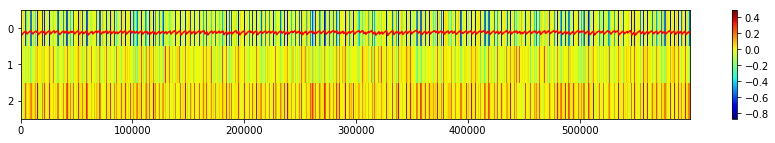

In [35]:
x = array(eva.out['x'])
theta = array(eva.out['theta'])
figure(figsize=(15,2)); plot(theta, 'r'); imshow(x[1000:].T, aspect='auto', interpolation='nearest', cmap='jet'); colorbar();

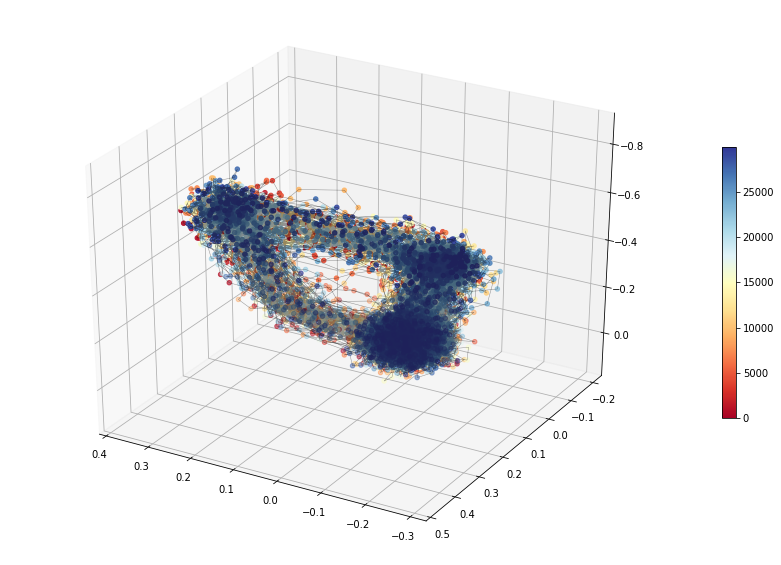

In [40]:
T0, dT = 1000, 20
S = array([x[T0::dT,0], x[T0::dT,1], x[T0::dT,2]]); shuffle(S)
Td.plot4D(S[0], S[1], S[2], 'RdYlBu', kwaSca={'s':20}, fig=figure(figsize=(15,10)), line=1, rev='rand', cbar=1)

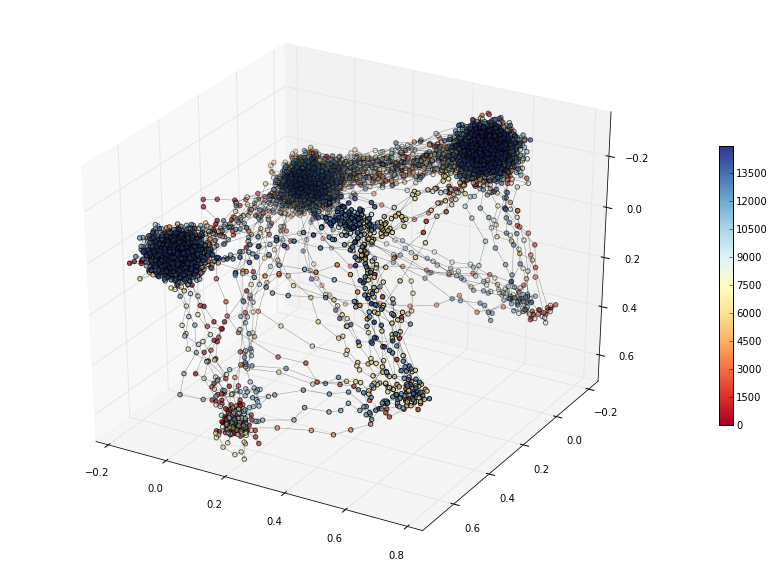

In [47]:
#parameters ?
T0, dT = 1000, 20
S = array([x[T0::dT,0], x[T0::dT,1], x[T0::dT,2]]); shuffle(S)
Td.plot4D(S[0], S[1], S[2], 'RdYlBu', kwaSca={'s':20}, fig=figure(figsize=(15,10)), line=1, rev='rand', cbar=1)